# Table of Contents

#### 01 Import Libraries and Data

#### 02 Data Cleaning

#### 03 Data Exploration and Hypothesis

#### 04 Supervised Machine Learning - Linear Regression

#### 05 Results

#### 06 Exports

# 01 Import Libraries and Data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# allow matplotlib visuals to be displayed
%matplotlib inline

In [3]:
path = r'/Users/Dena/Murder Data Analysis'

In [4]:
# import the clean UCR data
df_ucr = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ucr_clean.pkl'))

In [5]:
# check the shape
df_ucr.shape

(166225, 10)

In [6]:
# check the output
df_ucr.head()

,ORI,name,year,murders,cleared,state,county,agency,cold_cases,region
0,AK00101,ANCHORAGE,1965,7,6,Alaska,"Anchorage, AK",Anchorage,1,West
1,AK00101,ANCHORAGE,1966,18,16,Alaska,"Anchorage, AK",Anchorage,2,West
2,AK00101,ANCHORAGE,1967,1,1,Alaska,"Anchorage, AK",Anchorage,0,West
3,AK00101,ANCHORAGE,1968,7,5,Alaska,"Anchorage, AK",Anchorage,2,West
4,AK00101,ANCHORAGE,1969,7,4,Alaska,"Anchorage, AK",Anchorage,3,West


In [7]:
# import the clean SHR data
df_shr = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'shr_clean_2.pkl'))

In [8]:
# check the shape
df_shr.shape

(804735, 32)

In [10]:
# show all columns
pd.set_option('display.max_columns', None)

In [19]:
# check the output
df_shr.head(40)

,ID,county,ORI,state,agency,agent_type,source,solved,year,month,incident,action_type,homicide,situation,victim_age,victim_sex,victim_race,victim_ethnicity,offender_age,offender_sex,offender_race,offender_ethnicity,weapon,relationship,circumstance,subcircumstance,additional_victims,additional_offenders,file_date,MSA,region,victim_age_category
0,197603001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,March,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,48,Male,Unknown,Unknown or not reported,68.0,Male,Black,Unknown or not reported,"Handgun - pistol, revolver, etc",Relationship not determined,Other arguments,nan,0,0,30180.0,"Anchorage, AK",West,Middle Age
1,197604001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,April,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,33,Female,White,Unknown or not reported,44.0,Male,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Girlfriend,Other arguments,nan,0,0,30180.0,"Anchorage, AK",West,Young Adult
2,197606001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,June,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,38,Male,White,Unknown or not reported,27.0,Male,Black,Unknown or not reported,"Handgun - pistol, revolver, etc",Stranger,Other,nan,0,0,30180.0,"Anchorage, AK",West,Middle Age
3,197606002AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,June,2,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,41,Male,White,Unknown or not reported,34.0,Male,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Other - known to victim,Other arguments,nan,0,0,30180.0,"Anchorage, AK",West,Middle Age
4,197607001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,July,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,33,Male,American Indian or Alaskan Native,Unknown or not reported,37.0,Female,American Indian or Alaskan Native,Unknown or not reported,Knife or cutting instrument,Brother,Other arguments,nan,0,0,30180.0,"Anchorage, AK",West,Young Adult
5,197608001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,No,1976,August,1,Adjustment,Murder and non-negligent manslaughter,Single victim/unknown offender(s),15,Male,White,Unknown or not reported,28.0,Unknown,Unknown,Unknown or not reported,"Handgun - pistol, revolver, etc",Relationship not determined,All suspected felony type,nan,0,0,30180.0,"Anchorage, AK",West,Minor
6,197609001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,No,1976,September,1,Normal update,Murder and non-negligent manslaughter,Single victim/unknown offender(s),47,Male,White,Unknown or not reported,28.0,Unknown,Unknown,Unknown or not reported,"Handgun - pistol, revolver, etc",Relationship not determined,Brawl due to influence of alcohol,nan,0,0,30180.0,"Anchorage, AK",West,Middle Age
7,197609002AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,No,1976,September,2,Normal update,Murder and non-negligent manslaughter,Single victim/unknown offender(s),40,Male,White,Unknown or not reported,28.0,Unknown,Unknown,Unknown or not reported,Other or type unknown,Relationship not determined,All suspected felony type,nan,0,0,30180.0,"Anchorage, AK",West,Middle Age
8,197609003AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,No,1976,September,3,Normal update,Murder and non-negligent manslaughter,Single victim/unknown offender(s),41,Female,White,Unknown or not reported,28.0,Unknown,Unknown,Unknown or not reported,Explosives,Relationship not determined,All suspected felony type,nan,0,0,30180.0,"Anchorage, AK",West,Middle Age
9,197610001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,October,1,Normal update,Murder and non-negligent manslaughter,Single vict

# 02 Data Cleaning

In [16]:
# check data type in the SHR
df_shr.dtypes

ID                       object
county                   object
ORI                      object
state                    object
agency                   object
agent_type               object
source                   object
solved                   object
year                     object
month                    object
incident                 object
action_type              object
homicide                 object
situation                object
victim_age              float64
victim_sex               object
victim_race              object
victim_ethnicity         object
offender_age            float64
offender_sex             object
offender_race            object
offender_ethnicity       object
weapon                   object
relationship             object
circumstance             object
subcircumstance          object
additional_victims        int64
additional_offenders      int64
file_date                object
MSA                      object
region                   object
victim_a

In [17]:
# change the ages to to integers
df_shr.victim_age = df_shr.victim_age.astype(int)

In [20]:
df_shr.offender_age = df_shr.offender_age.astype(int)

In [21]:
# check the output
df_shr.head()

,ID,county,ORI,state,agency,agent_type,source,solved,year,month,incident,action_type,homicide,situation,victim_age,victim_sex,victim_race,victim_ethnicity,offender_age,offender_sex,offender_race,offender_ethnicity,weapon,relationship,circumstance,subcircumstance,additional_victims,additional_offenders,file_date,MSA,region,victim_age_category
0,197603001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,March,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,48,Male,Unknown,Unknown or not reported,68,Male,Black,Unknown or not reported,"Handgun - pistol, revolver, etc",Relationship not determined,Other arguments,nan,0,0,30180.0,"Anchorage, AK",West,Middle Age
1,197604001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,April,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,33,Female,White,Unknown or not reported,44,Male,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Girlfriend,Other arguments,nan,0,0,30180.0,"Anchorage, AK",West,Young Adult
2,197606001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,June,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,38,Male,White,Unknown or not reported,27,Male,Black,Unknown or not reported,"Handgun - pistol, revolver, etc",Stranger,Other,nan,0,0,30180.0,"Anchorage, AK",West,Middle Age
3,197606002AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,June,2,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,41,Male,White,Unknown or not reported,34,Male,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Other - known to victim,Other arguments,nan,0,0,30180.0,"Anchorage, AK",West,Middle Age
4,197607001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,July,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,33,Male,American Indian or Alaskan Native,Unknown or not reported,37,Female,American Indian or Alaskan Native,Unknown or not reported,Knife or cutting instrument,Brother,Other arguments,nan,0,0,30180.0,"Anchorage, AK",West,Young Adult


In [22]:
# drop unessesary column
df_shr.drop('file_date', inplace = True, axis = 1)

In [23]:
# check the output
df_shr.head()

,ID,county,ORI,state,agency,agent_type,source,solved,year,month,incident,action_type,homicide,situation,victim_age,victim_sex,victim_race,victim_ethnicity,offender_age,offender_sex,offender_race,offender_ethnicity,weapon,relationship,circumstance,subcircumstance,additional_victims,additional_offenders,MSA,region,victim_age_category
0,197603001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,March,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,48,Male,Unknown,Unknown or not reported,68,Male,Black,Unknown or not reported,"Handgun - pistol, revolver, etc",Relationship not determined,Other arguments,nan,0,0,"Anchorage, AK",West,Middle Age
1,197604001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,April,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,33,Female,White,Unknown or not reported,44,Male,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Girlfriend,Other arguments,nan,0,0,"Anchorage, AK",West,Young Adult
2,197606001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,June,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,38,Male,White,Unknown or not reported,27,Male,Black,Unknown or not reported,"Handgun - pistol, revolver, etc",Stranger,Other,nan,0,0,"Anchorage, AK",West,Middle Age
3,197606002AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,June,2,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,41,Male,White,Unknown or not reported,34,Male,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Other - known to victim,Other arguments,nan,0,0,"Anchorage, AK",West,Middle Age
4,197607001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,July,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,33,Male,American Indian or Alaskan Native,Unknown or not reported,37,Female,American Indian or Alaskan Native,Unknown or not reported,Knife or cutting instrument,Brother,Other arguments,nan,0,0,"Anchorage, AK",West,Young Adult


# 03 Data Exploration and Hypothesis

Scatterplots

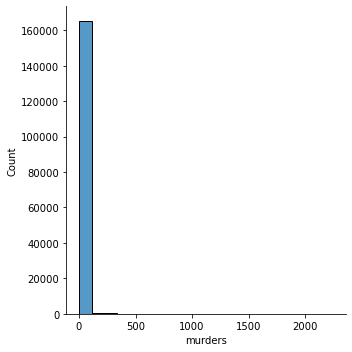

In [31]:
# check for outliers
sns.displot(df_ucr['murders'], bins=20)

In [32]:
# find the max
df_ucr['murders'].max()

2245

In [33]:
# find the mean
df_ucr['murders'].mean()

5.726996540833208

In [34]:
# find the median
df_ucr['murders'].median()

1.0

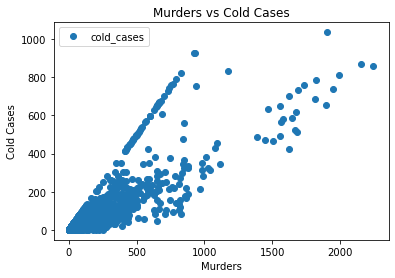

In [36]:
# make a scatterplot of the data

df_ucr.plot(x = 'murders', y='cold_cases',style='o')
plt.title('Murders vs Cold Cases')  
plt.xlabel('Murders')  
plt.ylabel('Cold Cases')  
plt.show()

Hypothesis:
    There is a linear relationship between murders and cold cases.

Prepare the Data

In [37]:
# reshape the variables into NumPy arrays and put them into separate objects

X = df_ucr['murders'].values.reshape(-1,1)
y = df_ucr['cold_cases'].values.reshape(-1,1)

In [38]:
X

array([[ 7],
       [18],
       [ 1],
       ...,
       [ 2],
       [ 1],
       [ 1]])

In [39]:
y

array([[1],
       [2],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [40]:
# split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 04 Supervised Machine Learning - Linear Regression

Training set

In [41]:
# create a regression object
regression = LinearRegression()

In [42]:
# fit the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [43]:
# Predict the values of y using X
y_predicted = regression.predict(X_test)

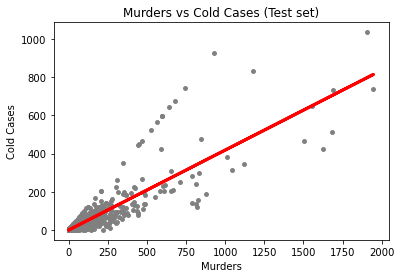

In [44]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Murders vs Cold Cases (Test set)')
plot_test.xlabel('Murders')
plot_test.ylabel('Cold Cases')
plot_test.show()

In [46]:
# ceate objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [47]:
# print the summary stats

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.41882366]]
Mean squared error:  57.56990696071706
R2 score:  0.7755760588383726


In [48]:
y_predicted

array([[ 0.03600348],
       [34.37954384],
       [ 0.03600348],
       ...,
       [ 0.45482715],
       [ 0.45482715],
       [ 0.03600348]])

In [49]:
# create a dataframe comparing the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0,0.036003
1,54,34.379544
2,0,0.036003
3,8,6.318358
4,0,0.454827
5,0,0.454827
6,0,0.873651
7,0,0.036003
8,0,0.036003
9,0,0.036003


Compare to how this regression fits the training set

In [50]:
y_predicted_train = regression.predict(X_train)

In [51]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [52]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.41882366]]
Mean squared error:  60.97530865889811
R2 score:  0.773350062383823


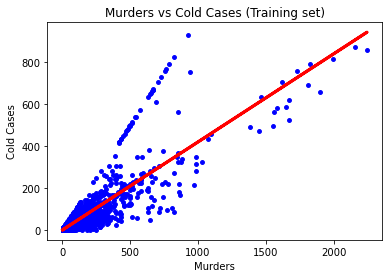

In [58]:
plot_train = plt
plot_train.scatter(X_train, y_train, color='blue', s = 15)
plot_train.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_train.title('Murders vs Cold Cases (Training set)')
plot_train.xlabel('Murders')
plot_train.ylabel('Cold Cases')
plot_train.show()

# 05 Results

A linear model is a good/moderate fit for this data. For both sets, r2 is around .77, and the mean squared error is around 60.

Therefore the hypothesis is true. There is a linear relationship between the murders and cold cases. However, other factors are probably coming into play here.

The source of the data explains that solving cold cases depends on leadership and if the local goverment is making solving homicides a priority or not. That could explain why the number of cold cases is not merely a steady percentage of the number of murders in each state. It depends on political factors, too. 

There is probably not too much bias at large here, as this data is merely a count of all homicides and clearances. However, there may be instances of local police departments under-reporting homicides or pver-reporting clearances in an attempt to make themselves look better. Where there are human decisions, there is always potential for bias.

# 06 Exports

In [56]:
# export the SHR as a pickle file
df_shr.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'shr_clean_3.pkl'))

In [57]:
# export the SHR as a CSV file
df_shr.to_csv(os.path.join(path, '02 Data','Prepared Data', 'shr_clean_2.csv'))

In [59]:
# export the scatterplots
plot_test.savefig(os.path.join(path, '04 Analysis','Visualizations', 'cold_test.png'),bbox_inches = 'tight')

<Figure size 432x288 with 0 Axes>

In [60]:
plot_train.savefig(os.path.join(path, '04 Analysis','Visualizations', 'cold_train.png'),bbox_inches = 'tight')

<Figure size 432x288 with 0 Axes>